In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

# Observing Data

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Cleaning Data

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df.Age.isna().sum()

177

In [16]:
df.Age.fillna(inplace=True, value=df.Age.median())

In [17]:
df.Embarked.isna().sum()

2

In [18]:
df.Embarked.fillna(inplace=True, value=df.Embarked.mode())

In [20]:
df['Sex'] = df.Sex.map({'male': 1, 'female':0})

# Find most accurate K

In [21]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y=df['Survived']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
knn_x = [i for i in range(1, 31)]
knn_y = []
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [31]:
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc = accuracy_score(y_test, pred, normalize=True)*float(100)
    knn_y.append(acc)

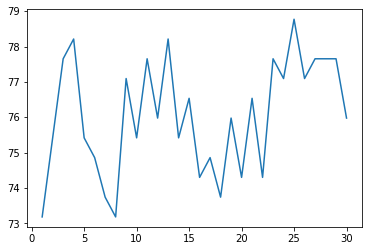

In [32]:
plt.plot(knn_x, knn_y)
plt.show()

Therefore k = 25


## Create AI

In [34]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

## Load Test Data and Clean


In [35]:
df_test = pd.read_csv('test.csv')

In [36]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df_test.Age.fillna(inplace=True, value=df_test.Age.median())
df_test.Embarked.fillna(inplace=True, value=df_test.Embarked.mode())
df_test['Sex'] = df_test.Sex.map({'male': 1, 'female':0})

In [38]:
x_test_2= df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]


In [40]:
y_predictions = knn.predict(x_test_2)

In [41]:
len(y_predictions)

418

In [42]:
df_test['Survived'] = pd.Series(y_predictions)

In [44]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0


In [46]:
final_df = df_test.filter(['PassengerId', 'Survived'])

In [47]:
final_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.239234
std,120.810458,0.427127
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,0.000000
max,1309.000000,1.000000


In [49]:
final_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,0
9,901,0
